In [89]:
# Data Science Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress the warnings 
import warnings
warnings.filterwarnings('ignore')

In [90]:
# Import the Dataset

advertising = pd.read_csv("C:/Users/Gaurav/OneDrive/Work/ML/Linear Regression/Advertising.csv")

In [91]:
advertising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [92]:
# Peeking the shape

advertising.shape

(200, 5)

In [93]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [94]:
advertising.describe(include = [float]) # 5 point summary for each numerical col

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


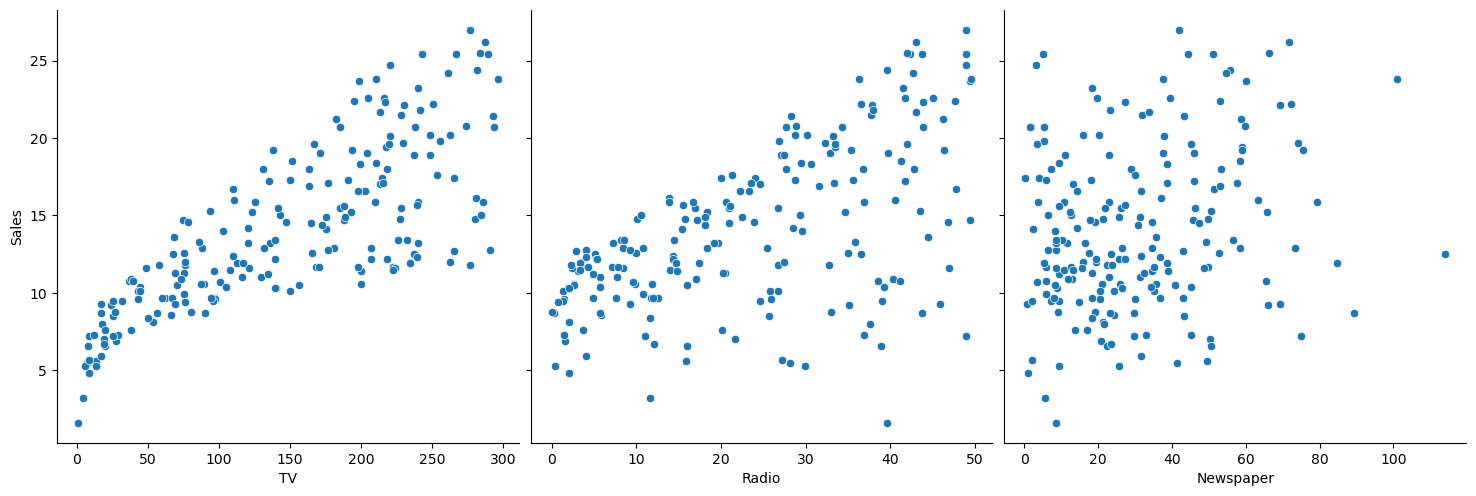

In [95]:
# Visualization
sns.pairplot(advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 5,kind = 'scatter')

# Analysis: 
# - TV has high corr with Sales
# - Radio has low corr with Sales
# - Newspaper has NO corr with Sales

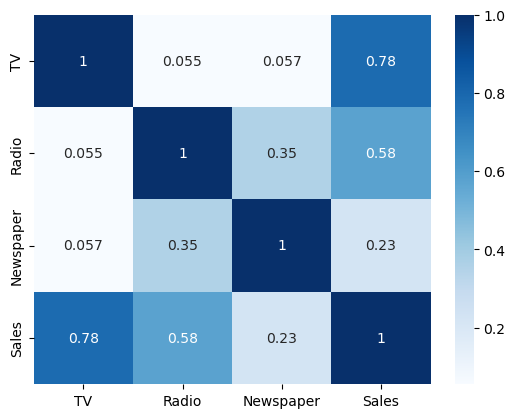

In [158]:
# Correlation Analysis
sns.heatmap(advertising[["TV","Radio","Newspaper","Sales"]].corr(), cmap = "Blues", annot = True)
plt.show()
# Analysis: No Feature VS Feature has high correlation | TV is strongly correlated to Sales

In [97]:
# Splitting Features and Target from the historic data
X = advertising['TV']  # Feature
y = advertising['Sales']  # Target

In [98]:
# Splitting the data into Train and Test (with split ratio = 70-30) # 70%(0.7) - 30%(0.3)
from sklearn.model_selection import train_test_split

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, random_state = 5) # random_state is the seed value
# X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, test_size = 0.3, random_state = 5) # either this
# ''' here it will calculate the other one automatically'''

# seed is the random number generator(RNG)

In [99]:
# random_state(seed value) it gives the same result every time
# if we don't give this, it provides different results every time

In [100]:
X_train_lm.head()  # here it shows the features

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
Name: TV, dtype: float64

In [101]:
y_train_lm.head()   # here it shows the target

170     8.4
182     8.7
59     18.4
185    22.6
12      9.2
Name: Sales, dtype: float64

In [102]:
X_test_lm.head()  

119     19.4
77     120.5
148     38.0
149     44.7
154    187.8
Name: TV, dtype: float64

In [103]:
y_test_lm.head()

119     6.6
77     14.2
148    10.9
149    10.1
154    15.6
Name: Sales, dtype: float64

In [104]:
# The reshape of variables is to be done only if you have a single feature, not for multiple features
# This is a requirement from sklearn
X_train_lm =  X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [105]:
from sklearn.linear_model import LinearRegression  # import Linear Regression Algo Class
# from sklearn.linear_model import LassoRegression
# from sklearn.linear_model import RidgeRegression

lm = LinearRegression()  # initialize the class object

In [106]:
# For every algo you will have a fit() method | This fit() method when called will start the training part of the algorithm
lm.fit(X_train_lm, y_train_lm)  # executing the training process for linear regression with the training data

LinearRegression()

In [107]:
print(lm.intercept_) # the best value of c

6.745302251222065


In [108]:
print(lm.coef_) # these are the best values of m1, m2, m3, ...., mn

[0.05024351]


In [109]:
# here, this is the linear regression model on this model
# sales^ = 0.05TV + 6.745

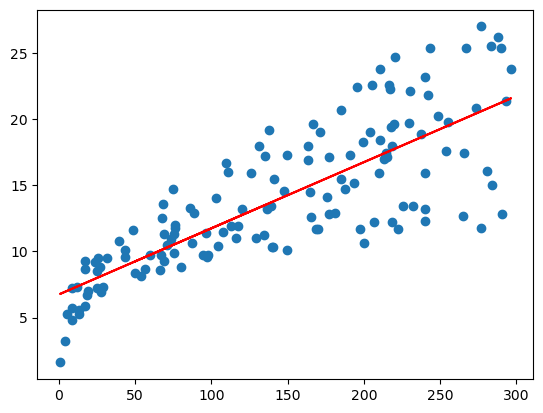

In [110]:
#Visualize the regression line - best fit line
plt.scatter(X_train_lm, y_train_lm)
plt.plot(X_train_lm, 6.745 + 0.050 * X_train_lm, 'red')
plt.show()

In [111]:
# In sklearn, to perform predictions after the model is generated, we use the predict() method
y_train_pred = lm.predict(X_train_lm) # prediction for training data
y_test_pred = lm.predict(X_test_lm)  # for testing data

In [112]:
y_train_pred

array([ 9.257478  ,  9.56898779, 17.33161084, 17.0452228 ,  7.94109791,
       17.46726833, 13.84471091, 19.22579135, 14.146172  , 13.58846898,
        8.32797297,  8.90577339, 11.90531123,  8.03153623, 21.63748007,
       12.26204019, 16.56288506, 15.29674849, 10.06639859, 16.67342079,
       18.40682206, 15.20631016, 20.15529638, 14.95006823, 15.82932974,
       21.30084852, 12.30725935, 10.18195867, 17.56775536, 10.53868763,
       18.79369712, 18.8891598 ,  7.60949071, 20.64768282, 11.64404495,
       20.84865688,  6.78047271,  8.09182845, 10.1065934 , 17.7184859 ,
       21.35109203, 16.74878607, 12.57354998, 17.68331544, 16.03532815,
       11.18180462, 10.2924944 , 13.79446739,  9.4333303 , 10.77483215,
       17.63809628, 17.61799887,  7.40851665, 14.27178078, 21.02953354,
        7.59441765, 17.81394858, 10.49849281, 21.19533713, 13.4930063 ,
       14.26675643, 13.33222705, 10.43317624, 15.06562832, 20.99436307,
       15.01036045, 17.13566113, 10.52863892, 16.03532815,  8.12

In [113]:
y_test_pred

array([ 7.72002644, 12.7996458 ,  8.65455582,  8.99118737, 16.18103435,
       12.82476755, 17.99984959,  9.63430436, 19.24588876, 12.26204019,
       21.11494751, 11.55360663, 18.67311269, 16.91961402, 16.73873736,
       18.7133075 , 14.35719476, 18.20082365, 10.58390679,  8.59928795,
       14.61343668, 13.92510053, 19.94427361, 18.52740649, 15.91976807,
       19.35140014, 17.91945996, 20.88382734,  7.11207991, 17.47229268,
       19.95432232, 11.4631683 , 21.49679822, 16.47747109, 16.78395653,
       11.78975115,  8.66460452, 13.73919952, 17.82399729,  9.87547323,
       13.36237316, 18.76857537,  7.64466117, 15.54294171, 18.2158967 ,
        8.98113866, 16.21118046, 18.16062883, 15.41230857,  7.13720167,
       12.93027893, 11.287316  , 17.14068548, 16.67342079, 10.67434512,
       11.25214554,  7.73007514, 20.82353512, 19.87393269, 10.51859022])

In [114]:
# Sklearn provides a metric package for performing evaluation of your models
from sklearn.metrics import r2_score  # regression coef (r2)

print(r2_score(y_train_lm, y_train_pred))  # training r-square

0.6411433688483876


In [115]:
print(r2_score(y_test_lm, y_test_pred))  # testing r-square

0.5111616978794153


Till here this is the end of the full cycle of one model

Training , Prediction and Evaluation

---
---

In [117]:
# here we didn't split the data 
# Create X and y 
feature_cols = ['TV', 'Radio', 'Newspaper']
X = advertising[feature_cols]
y = advertising.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X,y)

# print the coefficients
print(list(zip(feature_cols, lm2.coef_)))
print(lm2.intercept_)

[('TV', 0.04576464545539761), ('Radio', 0.18853001691820462), ('Newspaper', -0.0010374930424763159)]
2.9388893694594067


In [118]:
y_pred = lm2.predict(X)
y_pred

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [176]:
# LR Model for TV and Radio and all rows
feature_cols = ['TV', 'Radio']
X = advertising[feature_cols]
y = advertising.Sales

# instantiate and fit
lm3 = LinearRegression()
lm3.fit(X, y)

# print the coefficients
print(list(zip(feature_cols, lm3.coef_)))
print(lm3.intercept_)

y_pred = lm3.predict(X)
print(y_pred)

print('R Square:',r2_score(y, y_pred))

# Analysis: Newspaper not adding to sales, hence they should not invest in newspaper ads and focus on TV and Radio ads

[('TV', 0.04575481510107616), ('Radio', 0.18799422662030923)]
2.9210999124051362
[20.55546463 12.34536229 12.33701773 17.61711596 13.22390813 12.51208449
 11.71821241 12.10551553  3.7093792  12.55169696  7.0358597  17.25652015
 10.60866187  8.81095051 18.44466773 20.82891539 12.90386507 23.24107626
  9.94121476 14.15384619 18.12139161 14.74206357  6.51417168 16.54402663
  8.14035215 15.6080206  14.96769383 17.0463346  19.39954145  9.15929748
 21.64292187 11.35791808  7.65045928 18.83346334  7.56302763 16.99280099
 23.36720719 15.6258994   9.91257829 20.4405801  16.37872122 17.29870935
 21.5621537  13.96692266  8.9009974  15.16263814  8.88644967 21.69944046
 16.28690268  8.18162949 12.64569407  9.31962792 20.66180115 19.96126242
 20.35512357 21.30864743  8.53774783 12.76239488 21.89072858 18.10746914
  5.74497097 22.90418658 16.78413768 13.18474853 16.96570907  7.82652846
  8.98703456 12.02066194 18.95313425 21.09369037 17.78350693 10.63329605
 10.35113844  9.91334008 17.30983543 11.909

# adj r2 for tv + radio

In [132]:
# Number of rows (samples) in test set
n = X_test_lm.shape[0]

In [122]:
# Number of features (columns)
p = X_test_lm.shape[1]

In [150]:
# Calculate Adjusted R²
adj_r2 = 1 - (1-r2_score(y, y_pred)) * (n-1) / (n-p-1)
print(adj_r2)

0.8954217483429455


# r2 for Radio + Newspaper

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [198]:
# define the features and target
feature_cols = ["Radio", "Newspaper"]
X = advertising[feature_cols]
y = advertising['Sales']

# split the data
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, test_size = 0.8, random_state = 5)

# Create and train the model
lm = LinearRegression()
lm.fit(X_train_lm, y_train_lm)

# print the coefficient
print('Coefficient: ', list(zip(feature_cols, lm.coef_)))
print('Intercept: ', lm.intercept_)

# Predict on test set
y_pred = lm.predict(X_test_lm)
print(y_pred)

# R2 on test set
r2 = r2_score(y_test_lm, y_pred)
print("R2 on test set: ", r2)

# Adjusted R² calculation
n = X_test_lm.shape[0]   # number of rows in test set
p = X_test_lm.shape[1]   # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R² on Test Set:", adj_r2)

Coefficient:  [('Radio', 0.16259120446463915), ('Newspaper', 0.022352806238055883)]
Intercept:  8.355472618150376
[11.45539947 13.30673179 15.17389655 13.0107935  11.99849869 10.8098204
  9.09439529 14.21375507 13.27357352 11.3891108  10.69819574  8.74851107
  9.70997871 12.68760515 17.72864649 14.0508208  16.37812853 15.20045083
  8.81636711 16.0978372   8.96373804 13.40104027 13.39350893 10.80380068
 17.17929599 15.90615947  9.20110448 16.0413709  13.84969164 16.10241926
  9.36042156 16.55700673 12.89948403 15.80107341  9.63291245  9.99681828
  9.2655288  11.25275868 14.60067196 10.81317815 12.12055788 11.4858679
 14.95172252 12.71788812 11.6889075  15.75341851 11.87060526 12.03981868
 11.98460457 15.81132247 14.25830309  8.92283508 10.31135282 12.46125753
 16.7359128  10.76312073 12.00355353 10.47599384 16.52081555 15.22415766
 10.65282222  9.94612083 13.35979425 16.12645094 15.53547383 12.64803801
 13.74561655 13.71948896 12.668341   11.84828033 12.40439242 13.02481734
 13.35593584

# TV + Radio + Newspaper

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
advertising = pd.read_csv("Advertising.csv")

# Select all 3 features
feature_cols = ['TV', 'Radio', 'Newspaper']
X = advertising[feature_cols]
y = advertising['Sales']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Print coefficients and intercept
print("Coefficients:", list(zip(feature_cols, lm.coef_)))
print("Intercept:", lm.intercept_)

# Predict on test set
y_pred = lm.predict(X_test)
print(y_pred)

# R² score
r2 = r2_score(y_test, y_pred)
print("R² on Test Set:", r2)

# Adjusted R²
n = X_test.shape[0]   # number of rows in test set
p = X_test.shape[1]   # number of features (3 here)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R² on Test Set:", adj_r2)

Coefficients: [('TV', 0.044729517468716326), ('Radio', 0.18919505423437655), ('Newspaper', 0.0027611143413671757)]
Intercept: 2.979067338122629
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]
R² on Test Set: 0.899438024100912
Adjusted R² on Test Set: 0.8910578594426547
